In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datafb.special.home0 import data_home0_ermt123, data_home0_ermspe_r0_top1, data_home0_ermspe_r0_m20, data_home0_ermspe_m3, data_home0_erm123t123, data_home0_erm0_spe, data_home0123_spe
from datafb.special.home1 import data_home1

In [3]:
from datafb.special.home import data_home_spe

In [4]:
from datafb.special.celeba2 import data_celeba2

In [5]:
import re
def process(l):
    new_l = re.split('\s+', l)
    new_l = [float(re.sub(",", "", ll)) for ll in new_l if ll != ","]
    if len(data_home0_ermspe_m3.keys) == len(new_l):
        return dict(zip(data_home0_ermspe_m3.keys, new_l))
    else:
        keys_filtered = [key for key in data_home0_ermspe_m3.keys if "_in_" not in key]
        assert len(keys_filtered) == len(new_l)
        return dict(zip(keys_filtered, new_l))

In [6]:
data_home0_ermspe_m3_l = {}
for key in data_home0_ermspe_m3.l.keys():
    data_home0_ermspe_m3_l[key] = []
    for l in data_home0_ermspe_m3.l[key]:
        data_home0_ermspe_m3_l[key].append(process(l))

In [7]:
#from datafb.home import data_home0_diwa_steps_div
#from datafb import data_retraining_top1, data_retraining_diwa, robust_lp, data_retraining_diwa_llr, robust_lp_diwa, robust_lp_top1

In [8]:
from codeplot.plot import *
import matplotlib.pyplot as plt
key_acc_val="env_1_out_acc+env_2_out_acc+env_3_out_acc/3"
key_acc_train="env_1_in_acc+env_2_in_acc+env_3_in_acc/3"

In [9]:
def plot_iter(ll_m, key1, orders=None, add_legend=True, key_axis1="acc", key_axis2=None, labels=None, key_annot=None, legends=None, title=None):

    if labels is None:
        labels = [str(i) for i in range(len(ll_m))]
    if orders is None:
        orders = ["no", "no"]
    if not isinstance(orders, list):
        orders = [orders for i in range(len(ll_m))]
    fig, ax1 = plt.subplots()
    plt.xlabel(dict_key_to_label.get(key1, key1), fontsize="x-large")
    colors = cm.rainbow(np.linspace(0.3, 1, len(ll_m)))
    ax1.set_ylabel(dict_key_to_label.get(key_axis1, key_axis1), fontsize="x-large")

    def plot_with_int(l, ax, color, label, key2, marker, linestyle, order):
        t = get_x(l, key1)
        if t == []:
            return

        l = [ll for ll in l]# if key2 in ll]
        ax.scatter(
            get_x(l, key1),
            get_x(l, key2),
            color=color,
            label=label,
            marker=marker
        )
        if key_annot:
            n = len(get_x(l, key1))
            for i in range(n):
                ax.annotate(get_x(l, key_annot)[i], (get_x(l, key1)[i], get_x(l, key2)[i]), color=color)

        if order != "no":
            fit_and_plot(key1, key2, l, order=order, label=label, color=color, ax=ax, linestyle=linestyle)
    
    for i, l_m in enumerate(ll_m):
        plot_with_int(
            l_m,
            ax1,
            color=colors[i],
            label=dict_key_to_label.get(i, labels[i]),
            key2=key_axis1,
            marker=".",
            order=orders[0],
            linestyle="-"
        )
    if key_axis1 in dict_key_to_limit:
        ax1.set_ylim(dict_key_to_limit[key_axis1])
    
    if key_axis2:
        ax2 = ax1.twinx()
        ax2.set_ylabel(dict_key_to_label.get(key_axis2, key_axis2), fontsize="x-large")

        for i, l_m in enumerate(ll_m):
            plot_with_int(
                l_m,
                ax2,
                color=colors[i],
                label=dict_key_to_label.get(i, labels[i]),
                key2=key_axis2,
                marker="x",
                order=orders[-1],
                linestyle="--"
            )
        if key_axis2 in dict_key_to_limit:
            ax2.set_ylim(dict_key_to_limit[key_axis2])
    if key1 in dict_key_to_limit:
        plt.xlim(dict_key_to_limit[key1])
    if add_legend:
        legend1 = ax1.legend(fontsize="x-large", loc="lower left")
        title1 = dict_key_to_label.get(key_axis1)
        if legends:
             title1= legends[0]
        legend1.set_title(title1, prop = {'size':15})
        if key_axis2:
            title2 = dict_key_to_label.get(key_axis2)
            if legends:
                title2 = legends[1]
            legend2 = ax2.legend(fontsize="x-large", loc="lower right")
            legend2.set_title(title2, prop = {'size':15})
    if title:
        fig.suptitle(title, fontsize=20)
    return fig

# celeba

In [ ]:

l = [
     data_celeba2.l["01"],
     data_celeba2.l["t01"],
     data_celeba2.l["0"],
     data_celeba2.l["1"],]

fig = plot_iter(
    l,
    "step", key_axis1="acc", orders="2",
    labels=["01", "t01", "0", "1"],
    legends=["celeba2"])

# Top1 compare special vs all

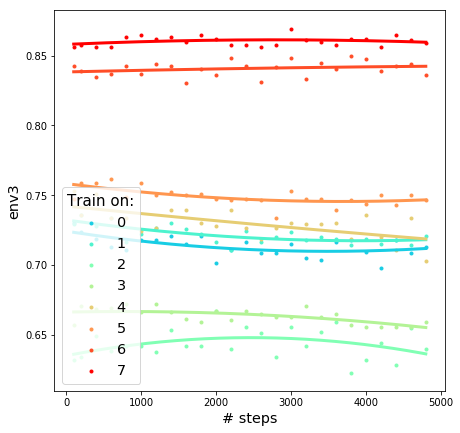

In [13]:
dict_key_to_limit = {}
l = [
    data_home_spe.l["0top1"],
    data_home_spe.l[0],
    data_home_spe.l["1top1"],
    data_home_spe.l[1],
    data_home_spe.l["2top1"],
    data_home_spe.l[2],
    data_home_spe.l["3top1"],
    data_home_spe.l[3],
]

fig = plot_iter(
    l,
    "step", key_axis1="env3", orders="2",
    legends=["Train on:"])

In [ ]:
fig = plot_iter([data_home0_ermspe_r0_top1.l["all"], data_home0_ermspe_r0_top1.l["1"], data_home0_ermspe_r0_top1.l["2"], data_home0_ermspe_r0_top1.l["3"]], "step", key_axis1=key_acc_val, orders="2", key_axis2=None, labels=["all", "1", "2", "3"], legends=["Train on:", "Train on:"])

In [ ]:
fig = plot_iter(
    [data_home0_ermspe_r0_top1.l["all"], data_home0_ermspe_r0_top1.l["1"], data_home0_ermspe_r0_top1.l["2"], data_home0_ermspe_r0_top1.l["3"]],
    "step", key_axis1="acc", orders="2", key_axis2="env_1_out_acc+env_2_out_acc+env_3_out_acc/3",
    labels=["all", "1", "2", "3"],
                legends=["Train on:", "Train on:"])

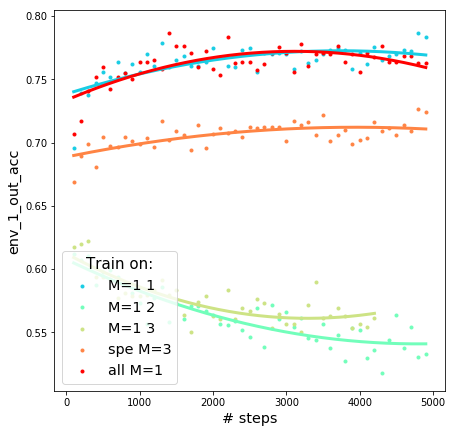

In [14]:
dict_key_to_limit = {}
l = [
    data_home0_ermspe_r0_top1.l["1"],
    data_home0_ermspe_r0_top1.l["2"],
    data_home0_ermspe_r0_top1.l["3"],
     data_home0_ermspe_m3_l["training"],
    data_home0_ermspe_r0_top1.l["all"],]

fig = plot_iter(
    l,
    "step", key_axis1="env_1_out_acc", orders="2",
    labels=["M=1 1", "M=1 2", "M=1 3", "spe M=3", "all M=1"],
    legends=["Train on:"])

# M=3: compare all vs avg of 3 spes

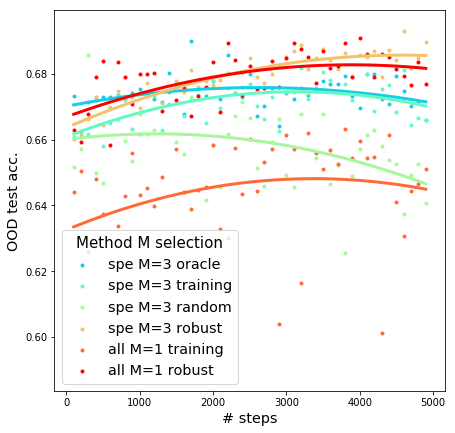

In [10]:

l = [
     data_home0_ermspe_m3_l["oracle"],
     data_home0_ermspe_m3_l["training"],
     data_home0_ermspe_m3_l["random"],
     data_home0_ermspe_m3_l["robust"],
    data_home0_ermspe_r0_top1.l["all"],
    data_home0_ermspe_r0_top1.l["allr"]]

fig = plot_iter(
    l,
    "step", key_axis1="acc", orders="2",
    labels=["spe M=3 oracle", "spe M=3 training", "spe M=3 random", "spe M=3 robust", "all M=1 training",  "all M=1 robust"],
    legends=["Method M selection"])

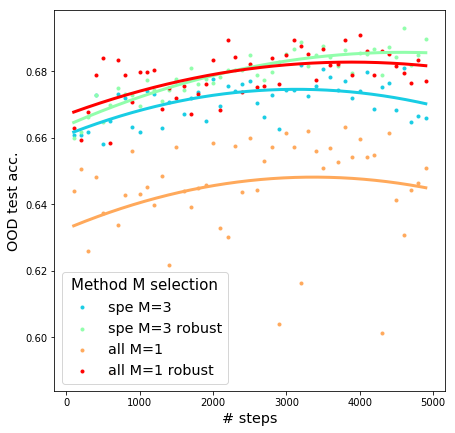

In [11]:
dict_key_to_limit = {}
l = [
     data_home0_ermspe_m3_l["training"],
     data_home0_ermspe_m3_l["robust"],
    data_home0_ermspe_r0_top1.l["all"],
    data_home0_ermspe_r0_top1.l["allr"]]

fig = plot_iter(
    l,
    "step", key_axis1="acc", orders="2",
    labels=["spe M=3", "spe M=3 robust", "all M=1",  "all M=1 robust"],
    legends=["Method M selection"])

In [ ]:

l = [
     data_home0_ermspe_r0_top1.l["all"], 
     data_home0_ermspe_m3_l["training"],
     data_home0_ermspe_m3_l["training4"],
     data_home0_ermspe_m3_l["training5"],
]

fig = plot_iter(
    l,
    "step", key_axis1="acc", orders="2",
    labels=["all", "spe", "spe+all", "spe+all r"],
    legends=["Method M selection"])

In [ ]:

l = [data_home0_ermspe_m3_l["oracle"],
     data_home0_ermspe_m3_l["training"],
     data_home0_ermspe_m3_l["random"]]

fig = plot_iter(
    l,
    "step", key_axis1="acc", orders="2",
    key_axis2="acc_ens",
    labels=["spe M=3 oracle", "spe M=3 training", "spe M=3 random"],
    legends=["WA", "ENS"])

# M=20: compare all vs spe

In [ ]:

l = [data_home0_ermt123.l["all"], data_home0_ermspe_r0_m20.l["1"],
     data_home0_ermspe_r0_m20.l["2"], data_home0_ermspe_r0_m20.l["3"]]
fig = plot_iter(
    l,
    "step", key_axis1="acc", orders="2", key_axis2=key_axis2, labels=["all", "1", "2", "3"],
    legends=["Train on:", "Train on:"])

In [ ]:

l = [data_home0_ermt123.l["all"], data_home0_ermspe_r0_m20.l["1"],
     data_home0_ermspe_r0_m20.l["2"], data_home0_ermspe_r0_m20.l["3"]]
fig = plot_iter(
    l,
    "step", key_axis1=key_acc_val, orders="2", key_axis2=key_axis2, labels=["all", "1", "2", "3"],
    legends=["Train on:", "Train on:"])

In [ ]:

l = [data_home0_ermt123.l["allr"], data_home0_ermspe_r0_m20.l["1r"],
     data_home0_ermspe_r0_m20.l["2r"], data_home0_ermspe_r0_m20.l["3r"]]
fig = plot_iter(
    l,
    "step", key_axis1="acc", orders="2", key_axis2=key_axis2, labels=["all", "1", "2", "3"],
    legends=["Train on:", "Train on:"], title="Robustness")

# M=20 or 60: compare DiWA vs. avg of specialized 20 * 3 runs 

In [ ]:
fig = plot_iter([data_home0_ermt123.l["all"], data_home0_ermt123.l["spe"]], "step", key_axis1="acc", orders="2", key_axis2="env_1_out_acc+env_2_out_acc+env_3_out_acc/3", labels=["M=20 all", "M=60 spe"], title="DiWA")

In [ ]:

fig = plot_iter([data_home0_ermt123.l["all"], data_home0_ermt123.l["spe21"], data_home0_ermt123.l["spe"]],
                "step", key_axis1="acc", key_axis2=None, orders="2",
                labels=["M=20 all", "M=21 spe", "M=60 spe"])

In [ ]:

    dict_key_to_limit = {"acc": [0.675, 0.705]}
l = [
     data_home0_ermt123.l["allr"],
     data_home0_erm123t123.l["allspe"],
     data_home0_erm123t123.l["allsper"]]

fig = plot_iter(
    l,
    "step", key_axis1="acc", orders="2",
    labels=["M=20 allr", "M=80 allspe", "M=80 allsper"],
    legends=["Best"])

In [ ]:

dict_key_to_limit = {"acc": [0.675, 0.705]}
l = [
     data_home0_ermt123.l["spe"],
     data_home0_ermt123.l["sper"],
     data_home0_ermt123.l["spebs96"],
     data_home0_ermt123.l["spebs96r"]
]
fig = plot_iter(
    l,
    "step", key_axis1=key_acc_train, orders="2",
    labels=["bs 32", "r", "bs 96", "r"],
    legends=["Best"])

In [ ]:

dict_key_to_limit = {"acc": [0.675, 0.705]}
l = [
     data_home0_ermt123.l["all"],
     data_home0_ermt123.l["spe"],
     data_home0_ermt123.l["sper"],
     data_home0_ermt123.l["spebs96"],
     data_home0_ermt123.l["spebs96r"]]

fig = plot_iter(
    l,
    "step", key_axis1="acc", orders="2",
    labels=["all", "bs 32", "r", "bs 96", "r"],
    legends=["Best"])

In [ ]:

dict_key_to_limit = {"acc": [0.675, 0.705]}
l = [
     data_home0_ermt123.l["all"],
     data_home0_ermt123.l["spe"],
     data_home0_ermt123.l["sper"],
     data_home0_ermt123.l["spebs96"],
     data_home0_ermt123.l["spebs96r"]]

fig = plot_iter(
    l,
    "step", key_axis1=key_acc_train, orders="2",, 
    labels=["all", "bs 32", "r", "bs 96", "r"],
    legends=["Best"])

In [ ]:

fig = plot_iter([data_home0_ermt123.l["allr"], data_home0_ermt123.l["spe21r"], data_home0_ermt123.l["sper"]],
                "step", key_axis1="acc", key_axis2=None, orders="2",
                labels=["M=20 allr", "M=21 sper", "M=60 sper"])

In [ ]:
dict_key_to_label = {"robust": "Robust Coeff", "step":"# debiasing steps","acc": "OOD test acc.", "length": "# training runs", "testin_acc": "OOD train acc.", "train_acc": "IID val acc."}
#dict_key_to_limit = {"step": [-10, 5000], "acc": [0.68, 0.76], "train_acc": [0.67, 0.87]}

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)

# retraining

In [ ]:
data_home0_erm0_spe

In [1]:

dict_key_to_limit = {}#"acc": [0.675, 0.705]}
l = [
     data_home0_erm0_spe.l["lp"],
     data_home0_erm0_spe.l["lp0"],
     data_home0_erm0_spe.l["ri"],]

fig = plot_iter(
    l,
    "step", key_axis1="acc", orders="2", 
    labels=["lp on source domains", "lp on target domain", "random init"],
    legends=["Init strategy:"])

NameError: name 'data_home0_erm0_spe' is not defined

In [15]:
import math

In [22]:
range(3.)

TypeError: 'float' object cannot be interpreted as an integer

In [21]:
3<float(3)

False

In [17]:
sorted([])

[]

# other domains

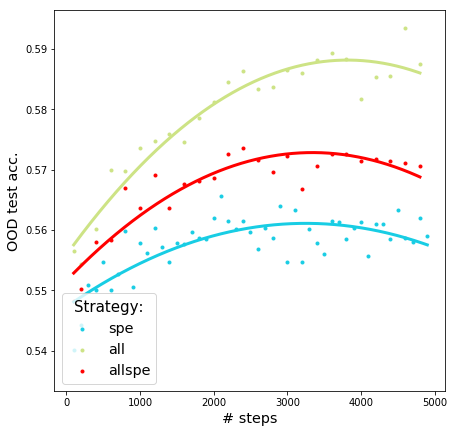

In [12]:

dict_key_to_limit = {}#"acc": [0.675, 0.705]}
l = [
     data_home0123_spe.l["1"],
     #data_home1.l["t023r"],
     data_home1.l["023"],
    data_home1.l["023t023"],
    #data_home1.l["023t023r"]
]

fig = plot_iter(
    l,
    "step", key_axis1="acc", orders="2", 
    labels=["spe", "all", "allspe"],
    legends=["Strategy:"])